# scRNA 

- augment seurat object with clusters and other data. Clean up object to remove unnecessary information.
- separately store matrices and metadata files for easy access

In [50]:
library(Seurat)
library(ggplot2)
library(Matrix)

In [2]:
rna = readRDS("../20200828_RNA_Seurat/sessions/20210725_n59378/seurat.rds")

In [8]:
rna@assays

$RNA
Assay data with 29165 features for 59378 cells
Top 10 variable features:
 HBA2, HBA1, KLF4, SOX2, POU5F1, KISS1R, LY6D, CCNA1, ALPG, SLURP2 


In [12]:
head(rna@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mt,qc_pass,selected,percent.oskm,RNA_snn_res.1.5,seurat_clusters,RNA_snn_res.2
,<fct>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
AAACCCAAGAGTGACC-1,scRNA-reprog,13707,3472,D0,4.238710,TRUE,0,0.007295542,6,13,13
AAACCCAAGTGCCAGA-1,scRNA-reprog,12326,3497,D0,5.719617,TRUE,1,0.016225864,6,13,13
AAACCCACACCATTCC-1,scRNA-reprog,14442,3996,D0,4.216867,TRUE,0,0.013848497,6,32,32
AAACCCACACGCGTCA-1,scRNA-reprog,8813,2793,D0,4.788381,TRUE,0,0.011346874,0,2,2
AAACCCAGTCCATAGT-1,scRNA-reprog,12115,3263,D0,6.009080,TRUE,0,0.000000000,0,2,2
AAACCCAGTTATTCTC-1,scRNA-reprog,14310,4524,D0,5.688330,TRUE,1,0.006988120,11,11,11


In [13]:
# remove stuff not used
rna@meta.data$RNA_snn_res.1.5 = NULL
rna@meta.data$RNA_snn_res.2 = NULL
rna@meta.data$seurat_clusters = NULL
rna@meta.data$selected = NULL
rna@meta.data$qc_pass = NULL

In [14]:
head(rna@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mt,percent.oskm
,<fct>,<dbl>,<int>,<chr>,<dbl>,<dbl>
AAACCCAAGAGTGACC-1,scRNA-reprog,13707,3472,D0,4.238710,0.007295542
AAACCCAAGTGCCAGA-1,scRNA-reprog,12326,3497,D0,5.719617,0.016225864
AAACCCACACCATTCC-1,scRNA-reprog,14442,3996,D0,4.216867,0.013848497
AAACCCACACGCGTCA-1,scRNA-reprog,8813,2793,D0,4.788381,0.011346874
AAACCCAGTCCATAGT-1,scRNA-reprog,12115,3263,D0,6.009080,0.000000000
AAACCCAGTTATTCTC-1,scRNA-reprog,14310,4524,D0,5.688330,0.006988120


Add cluster from ATAC transfer

In [30]:
cluster_config = read.table("../../figures_factory/configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

rownames(cluster_config) = cluster_config$cluster
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
1,1,#B03743,Fibroblast,1
2,2,#E85F6D,Fibroblast-like,3
3,3,#7C2730,Fibroblast-like,2
4,4,#F0A118,Intermediate,12
5,5,#78A824,Pre-iPSC,13
6,6,#A6D854,Pre-iPSC,14
7,7,#F01D35,Fibroblast-like,5
8,8,#13C4A3,iPSC,15
9,9,#406614,Partially-reprogrammed,10


In [31]:
atac.rna.label = read.table("../20200828_RNA_Seurat/sessions/20210725_n59378/atac.20210717_n62599.cluster.transfer.tsv",
                           header=T)
rownames(atac.rna.label) = atac.rna.label$barcode
atac.rna.label$barcode = NULL

all(rownames(atac.rna.label)==colnames(rna))

# transfer to new cluster
atac.rna.label$atac_new_cluster = cluster_config[atac.rna.label$atac_cluster, "new_cluster"]

head(atac.rna.label)

[1] TRUE

,sample,atac_cluster,atac_new_cluster
,<fct>,<int>,<int>
AAACCCAAGAGTGACC-1,D0,1,1
AAACCCAAGTGCCAGA-1,D0,1,1
AAACCCACACCATTCC-1,D0,1,1
AAACCCACACGCGTCA-1,D0,1,1
AAACCCAGTCCATAGT-1,D0,1,1
AAACCCAGTTATTCTC-1,D0,1,1


In [32]:
all(rownames(atac.rna.label) == rownames(rna@meta.data))

[1] TRUE

In [33]:
rna@meta.data$cluster = atac.rna.label$atac_new_cluster

In [34]:
head(rna@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mt,percent.oskm,cluster
,<fct>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>
AAACCCAAGAGTGACC-1,scRNA-reprog,13707,3472,D0,4.238710,0.007295542,1
AAACCCAAGTGCCAGA-1,scRNA-reprog,12326,3497,D0,5.719617,0.016225864,1
AAACCCACACCATTCC-1,scRNA-reprog,14442,3996,D0,4.216867,0.013848497,1
AAACCCACACGCGTCA-1,scRNA-reprog,8813,2793,D0,4.788381,0.011346874,1
AAACCCAGTCCATAGT-1,scRNA-reprog,12115,3263,D0,6.009080,0.000000000,1
AAACCCAGTTATTCTC-1,scRNA-reprog,14310,4524,D0,5.688330,0.006988120,1


In [42]:
lol = data.frame(x=rna@reductions$umap@cell.embeddings[,"UMAP_1"],
                 y=rna@reductions$umap@cell.embeddings[,"UMAP_2"],
                 c=rna@meta.data$cluster)

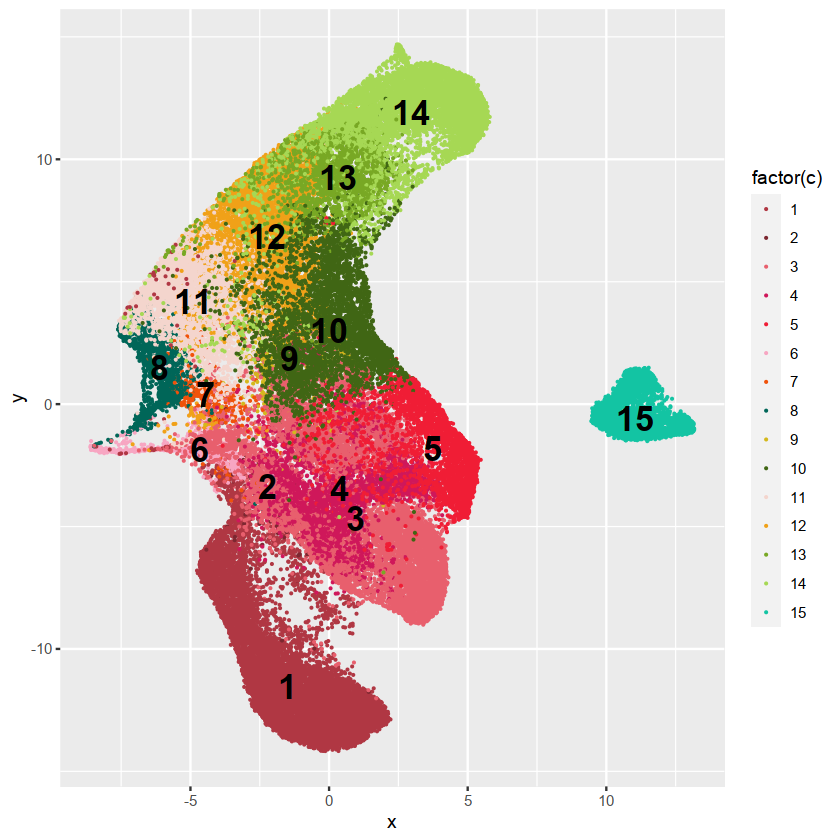

In [47]:
ggplot(lol) +
geom_point(aes(x=x,y=y,color=factor(c)), size=0.1) +
scale_color_manual(values=as.character(cluster_config$colour[order(cluster_config$new_cluster)])) +
geom_text(data=data.frame(aggregate(lol[,c("x","y")], 
                                    list(lol$c), median)),
         aes(x=x, y=y, label=Group.1), fontface = "bold", size=7)

In [48]:
saveRDS(rna, "/oak/stanford/groups/akundaje/surag/projects/reprog-package/analysis/scRNA/seurat.rds")

Write out main info in simpler formats -- counts matrix, gene list and metadata. 

In [52]:
writeMM(rna@assays$RNA@counts, 
        file="/oak/stanford/groups/akundaje/surag/projects/reprog-package/analysis/scRNA/gene_x_cell.mtx")

NULL

In [58]:
write.table(rownames(rna@assays$RNA@counts), 
            file="/oak/stanford/groups/akundaje/surag/projects/reprog-package/analysis/scRNA/genes.txt",
            col.names=F,
            row.names=F, quote=F)

In [65]:
metadata = rna@meta.data
metadata$umap1 = rna@reductions$umap@cell.embeddings[,"UMAP_1"]
metadata$umap2 = rna@reductions$umap@cell.embeddings[,"UMAP_2"]
metadata$barcode_sample = rownames(metadata)
metadata$orig.ident = NULL
rownames(metadata) = NULL
head(metadata)

,nCount_RNA,nFeature_RNA,sample,percent.mt,percent.oskm,cluster,umap1,umap2,barcode_sample
,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
1,13707,3472,D0,4.238710,0.007295542,1,-2.25953673,-12.160673,AAACCCAAGAGTGACC-1
2,12326,3497,D0,5.719617,0.016225864,1,-2.60020350,-11.891444,AAACCCAAGTGCCAGA-1
3,14442,3996,D0,4.216867,0.013848497,1,-2.60358142,-10.976259,AAACCCACACCATTCC-1
4,8813,2793,D0,4.788381,0.011346874,1,-0.09973414,-13.193298,AAACCCACACGCGTCA-1
5,12115,3263,D0,6.009080,0.000000000,1,-0.25522249,-11.648086,AAACCCAGTCCATAGT-1
6,14310,4524,D0,5.688330,0.006988120,1,-3.27127670,-7.056495,AAACCCAGTTATTCTC-1


In [66]:
write.table(metadata, 
            file="/oak/stanford/groups/akundaje/surag/projects/reprog-package/analysis/scRNA/cells.tsv",
            sep='\t',
            col.names=T,
            row.names=F, quote=F)

Write PCA of genes.

In [70]:
write.table(rna@reductions$pca@cell.embeddings, 
            file="/oak/stanford/groups/akundaje/surag/projects/reprog-package/analysis/scRNA/pca.tsv",
            sep='\t',
            col.names=T,
            row.names=T, quote=F)